In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


url = 'https://raw.githubusercontent.com/owen-shaffer/DS2002_Final_Project/main/Crime_Data.csv'

Crime_cville = pd.read_csv(url)

Crime_cville.head()

,RecordID,Offense,IncidentID,BlockNumber,StreetName,Agency,DateReported,HourReported,ReportingOfficer
0,1,Assist Citizen - Mental/TDO/ECO,202400034093,900.0,"ELLIOTT AVE, A",CPD,2024/10/02 00:24:02+00,2024,"Venereo, Arturo"
1,2,Larceny - Of Veh Parts/Access,202400034075,1600.0,"6TH ST SE, 28",CPD,2024/10/01 21:38:47+00,1738,"Kirby, Tyree"
2,3,Hit and Run,202400034071,900.0,EMMET ST N,CPD,2024/10/01 21:11:45+00,1711,"Bland, Johnnà"
3,4,Disorderly Conduct,202400034068,900.0,"ST CLAIR AVE, A",CPD,2024/10/01 20:59:17+00,1659,"Prevost, Payten"
4,5,Lost/FoundProperty,202400034047,700.0,RUGBY RD,CPD,2024/10/01 18:23:15+00,1423,"Brannon, Devin"


<ipython-input-2-ecf2ebf95677>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Crime_cville_2023['HourReported'] = Crime_cville_2023['DateReported'].dt.hour


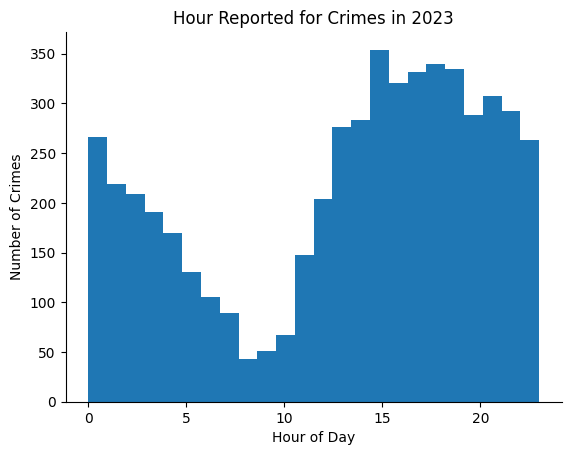

In [2]:
# Convert 'DateReported' to datetime objects
Crime_cville['DateReported'] = pd.to_datetime(Crime_cville['DateReported'])

# Filter for crimes in 2023
Crime_cville_2023 = Crime_cville[Crime_cville['DateReported'].dt.year == 2023]

# Extract the hour from 'DateReported'
Crime_cville_2023['HourReported'] = Crime_cville_2023['DateReported'].dt.hour

# Create the histogram
Crime_cville_2023['HourReported'].plot(kind='hist', bins=24, title='Hour Reported for Crimes in 2023')
plt.gca().spines[['top', 'right']].set_visible(False)
plt.xlabel('Hour of Day')
plt.ylabel('Number of Crimes')
plt.show()

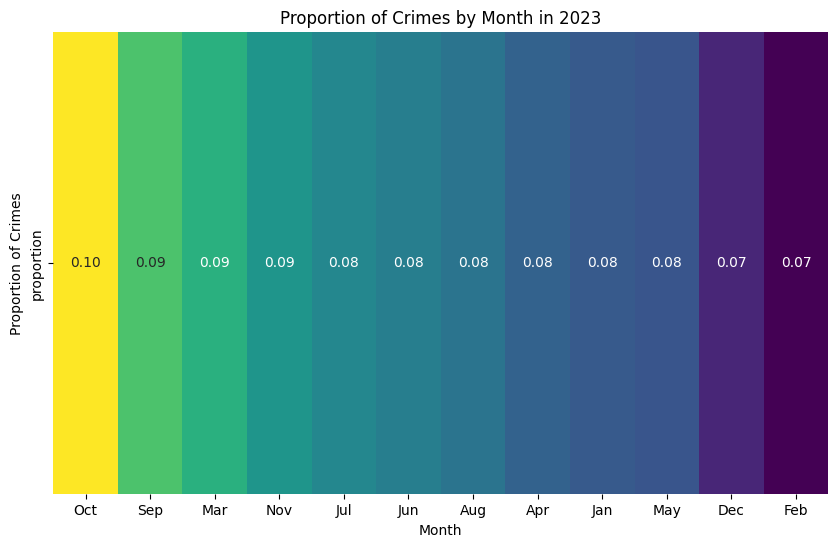

In [5]:
import calendar

# Calculate the proportion of crimes by month
monthly_crime_counts = Crime_cville_2023['DateReported'].dt.month.value_counts(normalize=True)

# Convert month numbers to month names
monthly_crime_counts.index = monthly_crime_counts.index.map(lambda x: calendar.month_abbr[x])

# Create a heatmap using seaborn
plt.figure(figsize=(10, 6))
sns.heatmap(pd.DataFrame(monthly_crime_counts).transpose(), annot=True, cmap='viridis', fmt=".2f", cbar=False)
plt.xlabel('Month')
plt.ylabel('Proportion of Crimes')
plt.title('Proportion of Crimes by Month in 2023')
plt.gca().spines[['top', 'right']].set_visible(False)
plt.show()